# Basic Plots

Using the Kaggle Heart Disease UCI dataset: https://www.kaggle.com/ronitf/heart-disease-uci
Common syntax used in pandas, matplotlib and seaborn.

The dataset contains the following features:
1. age (in years)
2. sex: (1 = male; 0 = female)
3. cp: chest pain type 
   -- Value 0: typical angina -- Value 1: atypical angina -- Value 2: non-anginal pain -- Value 3: symptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg: resting electrocardiographic results 
   -- Value 0: normal -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05    mV) -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak: ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
-- Value 0: upsloping
-- Value 1: flat
-- Value 2: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect and the label
14. target: 1 or 0  (condition: 0 = no disease, 1 = disease )

Acknowledgements
Original data https://archive.ics.uci.edu/ml/datasets/Heart+Disease



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

df = pd.read_csv("heart.csv")

## Bar Plots

Comparing discrete data, either pandas or matplotlib.

In [2]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
chest_pain = df.groupby(by="cp").median().reset_index()
chest_pain.head()

,cp,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,57.0,1.0,130.0,248.0,0.0,0.0,143.0,1.0,1.2,1.0,1.0,3.0,0.0
1,1,52.0,1.0,128.0,238.0,0.0,1.0,163.5,0.0,0.0,2.0,0.0,2.0,1.0
2,2,53.0,1.0,130.0,233.0,0.0,1.0,158.0,0.0,0.5,2.0,0.0,2.0,1.0
3,3,59.0,1.0,140.0,234.0,0.0,0.0,159.0,0.0,1.2,1.0,0.0,2.0,1.0


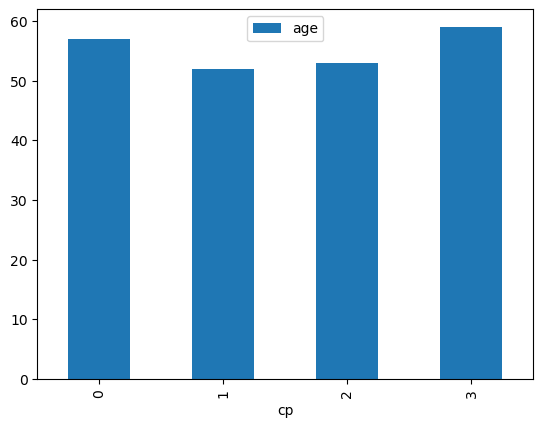

In [4]:
chest_pain.plot.bar(x="cp", y="age");

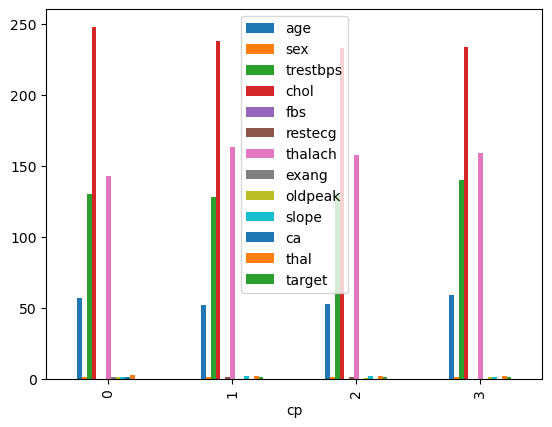

In [5]:
chest_pain.plot.bar(x="cp");

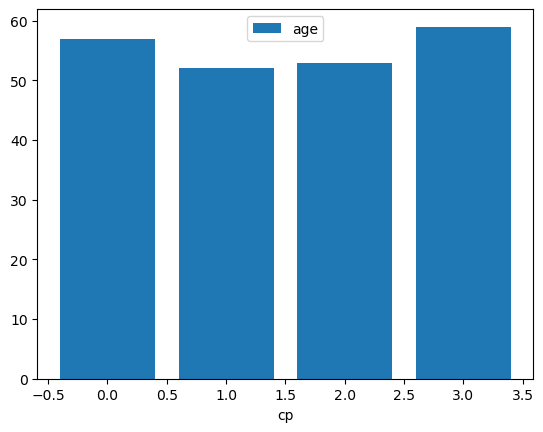

In [12]:
fig, ax = plt.subplots()
ax.bar(chest_pain["cp"], chest_pain["age"], label="age")
ax.set_xlabel("cp")
ax.legend();

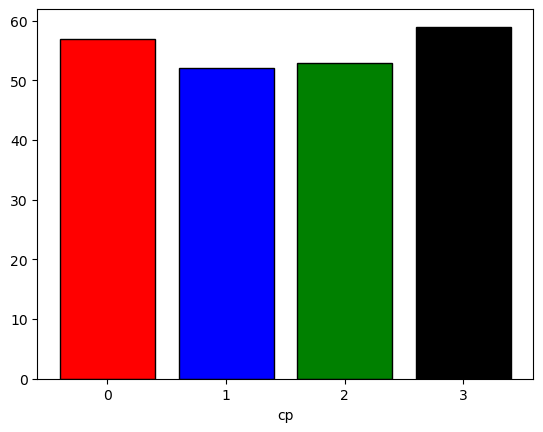

In [13]:
fig, ax = plt.subplots()
ax.bar(chest_pain["cp"], chest_pain["age"], label="age", 
       edgecolor="k", color=["red", "blue", "green", "black"])
ax.set_xlabel("cp")
ax.set_xticks(chest_pain["cp"]);

In [18]:
ax = sb.barplot("cp", "age", errcolor="w", capsize=0.1, data=df)

TypeError: barplot() got multiple values for argument 'data'

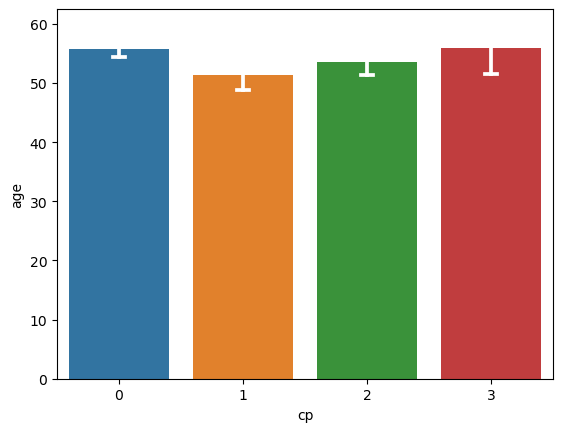

In [19]:
ax = sb.barplot(x="cp", y="age", errcolor="w", capsize=0.1, data=df)

## Scatter Plots


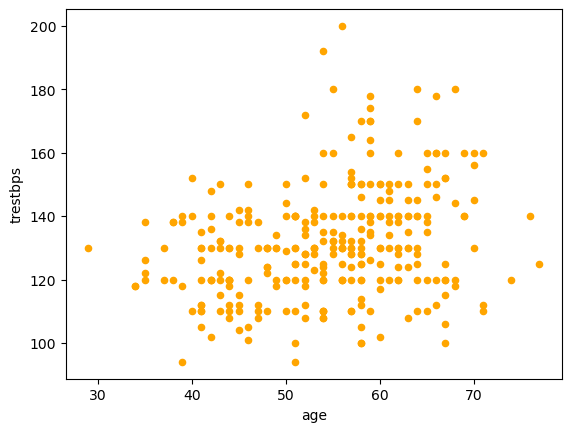

In [36]:
df.plot.scatter("age", "trestbps", color="orange");

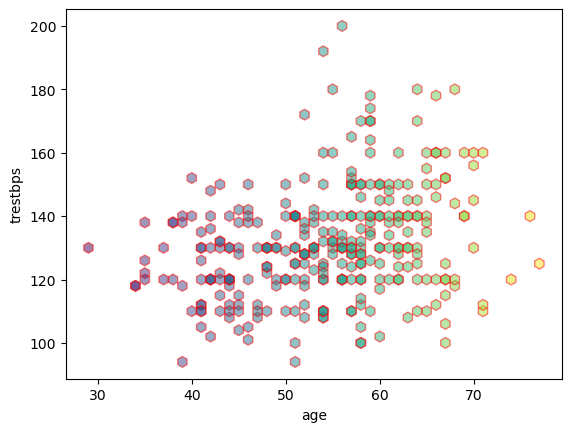

In [43]:
fig, ax = plt.subplots()
ax.scatter(df["age"], df["trestbps"], marker="h", 
           s=60, c=df["age"], edgecolors="red", alpha=0.5)
ax.set_xlabel("age")
ax.set_ylabel("trestbps");

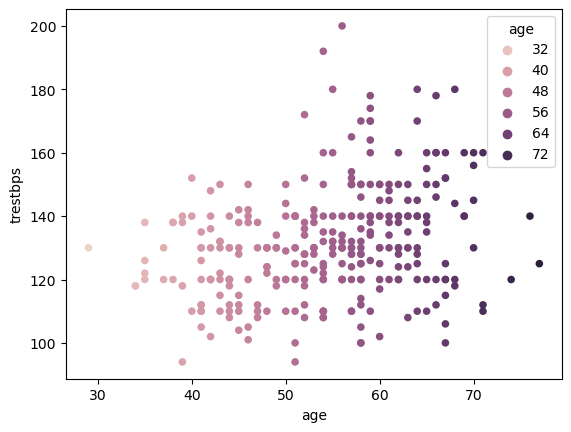

In [46]:
sb.scatterplot(x="age", y="trestbps", hue="age", s=30, edgecolor="none", data=df);

## Line Plots


In [47]:
ages = df.groupby("age").median().reset_index()
ages.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,29,1.0,1.0,130.0,204.0,0.0,0.0,202.0,0.0,0.00,2.0,0.0,2.0,1.0
1,34,0.5,2.0,118.0,196.0,0.0,0.5,183.0,0.0,0.35,2.0,0.0,2.0,1.0
2,35,1.0,0.0,124.0,195.0,0.0,1.0,165.0,0.5,0.70,2.0,0.0,2.5,0.5
3,37,0.5,2.0,125.0,232.5,0.0,1.0,178.5,0.0,1.75,1.0,0.0,2.0,1.0
4,38,1.0,2.0,138.0,175.0,0.0,1.0,173.0,0.0,0.00,2.0,4.0,2.0,1.0


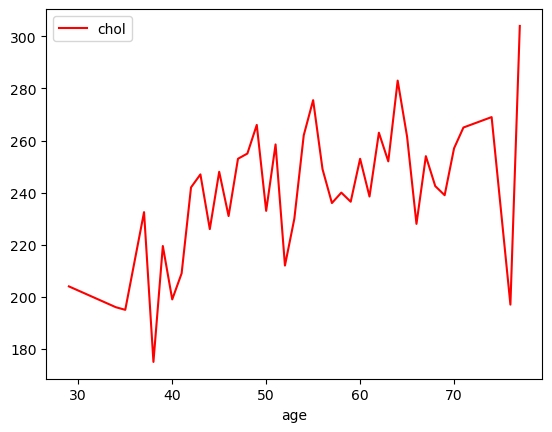

In [51]:
ages.plot.line("age", "chol", color="red");

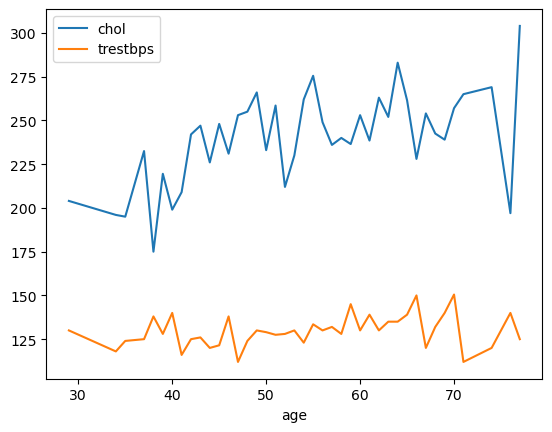

In [58]:
ages.plot.line("age", ["chol", "trestbps"]);

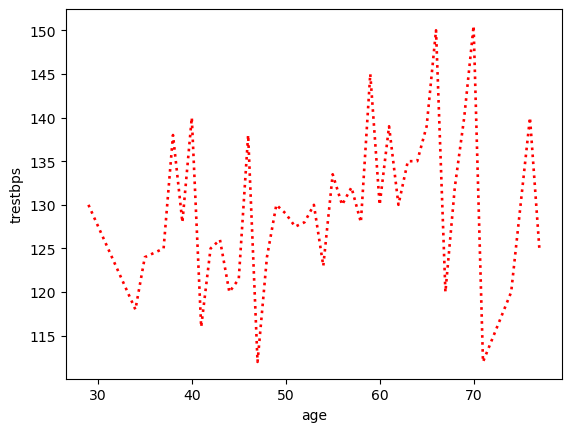

In [71]:
fig, ax = plt.subplots()
ax.plot(ages["age"], ages["trestbps"], ls=":", lw=1.9, color="red")
ax.set_xlabel("age")
ax.set_ylabel("trestbps");

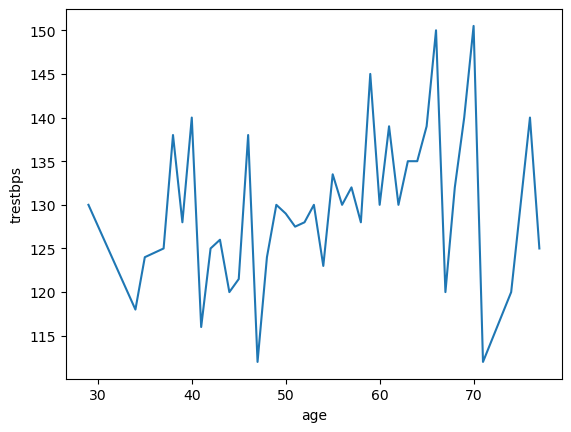

In [73]:
sb.lineplot(x="age", y="trestbps", data=ages);